# Imports

In [1]:
import numpy as np
import pandas as pd
import yfinance as yf
import pandas_datareader as pdr #used to read financial data
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import plotly.graph_objs as go
import plotly.express as px

import time
from datetime import date

# Selecting range of data

In [2]:
#Get todays date as a reference point
end = date.today()
#Get the date 70 years prior to the current date
start = date(year=end.year-70, month = end.month, day =end.day)

In [3]:
start, end

(datetime.date(1954, 4, 15), datetime.date(2024, 4, 15))

# Calculating GDP

In [4]:
gdppot = pdr.DataReader("GDPPOT", "fred", start=start)
#Data is quarter over quarter so shifting 4 should be a year over year change
gdppot['gdppot_us_yoy'] = round(gdppot.GDPPOT/gdppot.GDPPOT.shift(4)-1, 4) * 100
#Error in instructor copy should be shifting month over quarter instead of year
gdppot['gdppot_us_qoq'] = round(gdppot.GDPPOT/gdppot.GDPPOT.shift(1)-1, 4) * 100
gdppot.tail(15)

,GDPPOT,gdppot_us_yoy,gdppot_us_qoq
DATE,,,
2020-10-01,21153.567569,1.96,0.48
2021-01-01,21254.623031,1.94,0.48
2021-04-01,21355.872468,1.92,0.48
2021-07-01,21461.036491,1.94,0.49
2021-10-01,21567.144862,1.96,0.49
2022-01-01,21673.978006,1.97,0.50
2022-04-01,21782.011209,2.00,0.50
2022-07-01,21894.185817,2.02,0.51
2022-10-01,22006.866813,2.04,0.51


# Calculating intrest rates

I expanded on the lesson by having a comparison of intrest rates from the previous year

In [15]:
fedfunds = pdr.DataReader("FEDFUNDS", "fred", start=start)
fedfunds.tail(13)

,FEDFUNDS
DATE,
2023-03-01,4.65
2023-04-01,4.83
2023-05-01,5.06
2023-06-01,5.08
2023-07-01,5.12
2023-08-01,5.33
2023-09-01,5.33
2023-10-01,5.33
2023-11-01,5.33


In [16]:
#make a copy of the dataframe
fedfunds_shifted = fedfunds.copy()
#shifts the index by -1 year so we can have our previous date match our current date to join later
fedfunds_shifted.index = fedfunds_shifted.index - pd.DateOffset(years=-1)
fedfunds_shifted.tail(13)

,FEDFUNDS
DATE,
2024-03-01,4.65
2024-04-01,4.83
2024-05-01,5.06
2024-06-01,5.08
2024-07-01,5.12
2024-08-01,5.33
2024-09-01,5.33
2024-10-01,5.33
2024-11-01,5.33


In [7]:
# Merge the original DataFrame with the shifted DataFrame on the index
result = pd.merge(fedfunds, fedfunds_shifted, left_index=True, right_index=True, how='left', suffixes=('', '_prev_year'))
result.tail(26)

,FEDFUNDS,FEDFUNDS_prev_year
DATE,,
2022-02-01,0.08,0.08
2022-03-01,0.20,0.07
2022-04-01,0.33,0.07
2022-05-01,0.77,0.06
2022-06-01,1.21,0.08
2022-07-01,1.68,0.10
2022-08-01,2.33,0.09
2022-09-01,2.56,0.08
2022-10-01,3.08,0.08


## Note
I displayed 26 records,so we can confirm the accuracy of the prior year's intrests rate

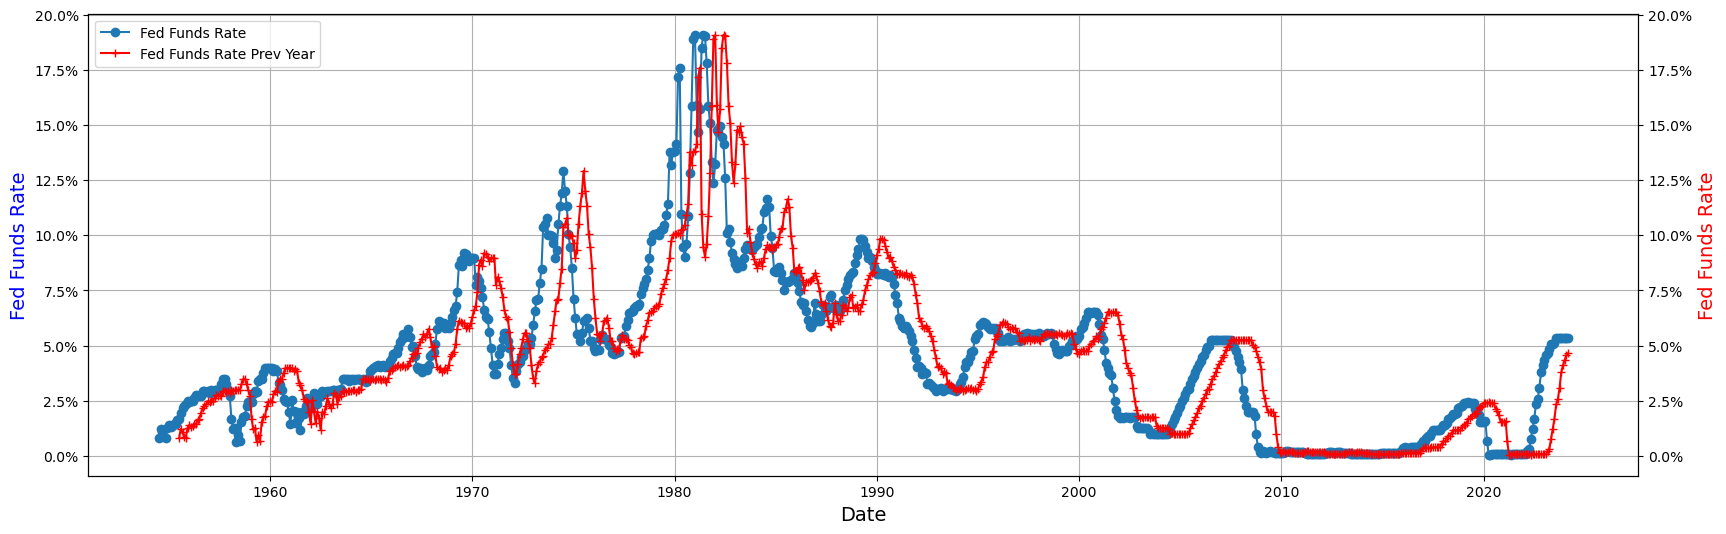

In [30]:
# Fed Funds
fig, ax = plt.subplots(figsize=(20, 6))
plt.grid(True)

# Plotting area under US potential GDP curve
# ax.fill_between(fedfunds.index, fedfunds.FEDFUNDS, color="red", alpha=0.3, label="Core CPI index (monthly)")

# # Creating a secondary y-axis for GDP growth percentage
ax2 = ax.twinx()
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
ax2.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
ax.plot(result.index, result.FEDFUNDS/100, marker="o", label="Fed Funds Rate")
ax2.plot(result.index, result.FEDFUNDS_prev_year/100, marker="+", label="Fed Funds Rate Prev Year", color='red')

# Setting labels and title
ax.set_xlabel("Date", fontsize=14)
ax.set_ylabel("Fed Funds Rate", color="blue", fontsize=14)
ax2.set_ylabel("Fed Funds Rate", color="red", fontsize=14)

# Adding legend
lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax.legend(lines + lines2, labels + labels2, loc='upper left')

plt.show()

## Note 
we can see the red line being shifted over one year. This way we can see the differences between the points when we compare year over year change

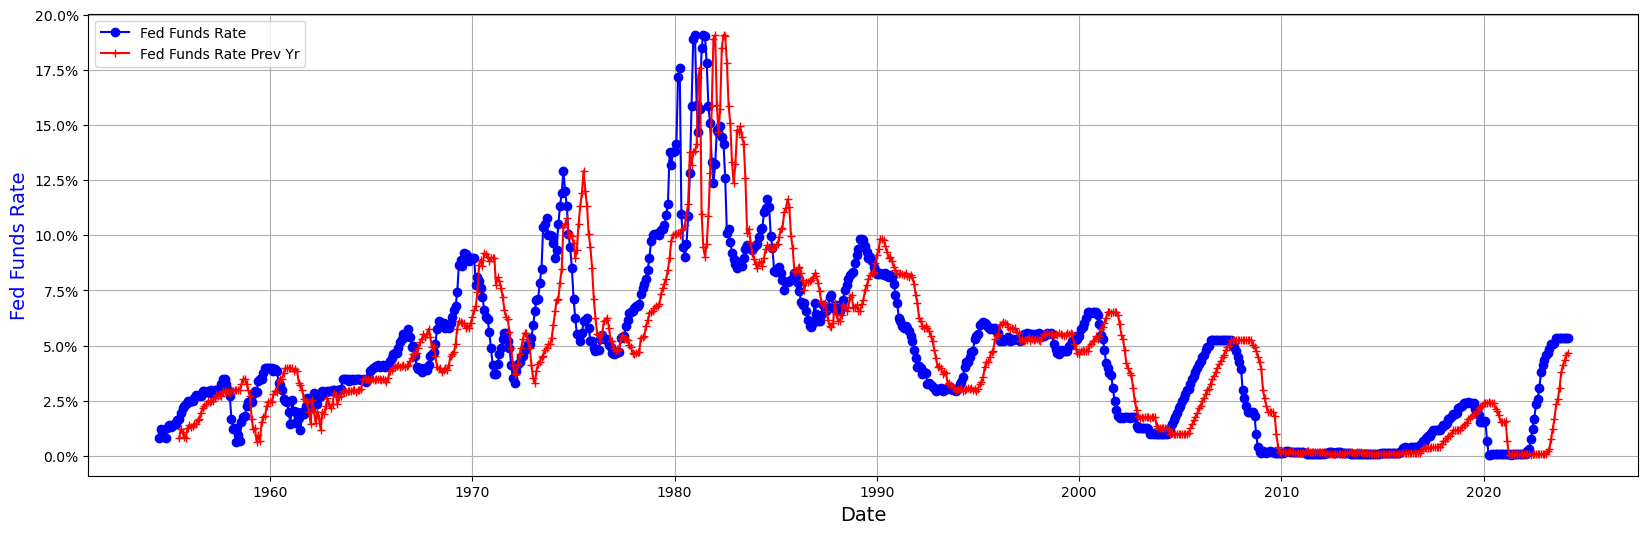

In [33]:
# Same visual with slighly different syntax

# Fed Funds
fig, ax = plt.subplots(figsize=(20, 6))
plt.grid(True)

# Plotting area under US potential GDP curve
# ax.fill_between(fedfunds.index, fedfunds.FEDFUNDS, color="red", alpha=0.3, label="Core CPI index (monthly)")

# Creating a secondary y-axis for GDP growth percentage
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
line1 = ax.plot(result.index, result.FEDFUNDS/100, marker="o", label="Fed Funds Rate", color="blue")[0]

# Plotting the second line on the same axis
line2 = ax.plot(result.index, result.FEDFUNDS_prev_year/100, marker="+", label="Fed Funds Rate Prev Yr", color='red')[0]

# Setting labels and title
ax.set_xlabel("Date", fontsize=14)
ax.set_ylabel("Fed Funds Rate", color="blue", fontsize=14)

# Adding legend
lines = [line1, line2]
labels = [line.get_label() for line in lines]
ax.legend(lines, labels, loc='upper left')

plt.show()